<a href="https://colab.research.google.com/github/sudharshan-del/Machine-Learning-Lab/blob/main/exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -L -o /content/taxi-trips-chicago-2024.zip\
  https://www.kaggle.com/api/v1/datasets/download/adelanseur/taxi-trips-chicago-2024 && unzip /content/taxi-trips-chicago-2024.zip && rm /content/taxi-trips-chicago-2024.zip && mv /content/Taxi_Trips_-_2024_20240408.csv /content/taxi_trips.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  110M  100  110M    0     0  88.1M      0  0:00:01  0:00:01 --:--:--  319M
Archive:  /content/taxi-trips-chicago-2024.zip
  inflating: Taxi_Trips_-_2024_20240408.csv  


In [2]:
import pandas as pd
data = pd.read_csv("/content/taxi_trips.csv")
data.head()


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 2. Select Features
# We'll use 'Trip Miles' and 'Trip Seconds' as independent variables to predict 'Trip Total'
selected_features = ['Trip Miles', 'Trip Seconds']
target = 'Trip Total'

# Create X (independent variables) and y (dependent variable)
X = data[selected_features].copy()
y = data[target].copy()

# Handle Missing Values
# Impute missing values in X
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

# Impute missing values in y
imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions on the Test Set
y_pred = model.predict(X_test)

print("\nSample Actual vs. Predicted Values (Test Set):")
predictions_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(predictions_df.head())


Sample Actual vs. Predicted Values (Test Set):
   Actual  Predicted
0    9.15  13.336673
1   28.25  27.289241
2   23.25  11.601811
3   51.75  52.274911
4   35.50  47.233368


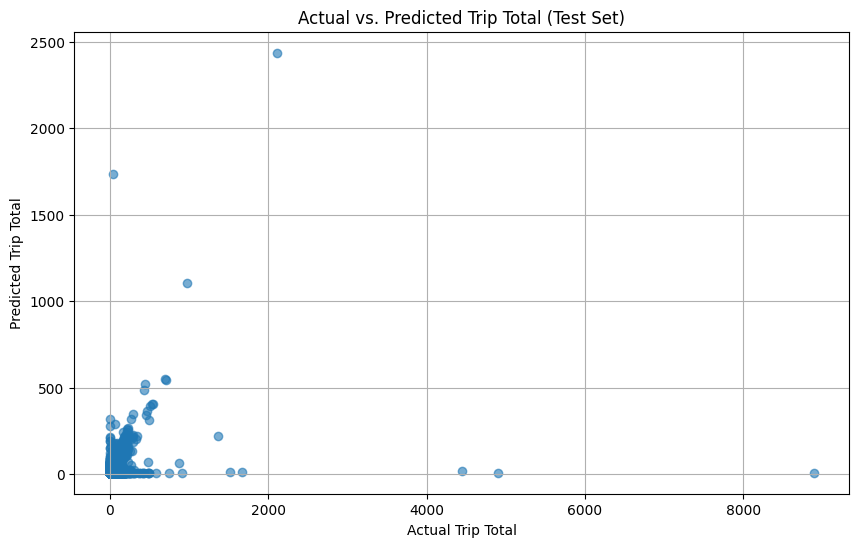

In [4]:
# Actual vs. Predicted values scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Trip Total")
plt.ylabel("Predicted Trip Total")
plt.title("Actual vs. Predicted Trip Total (Test Set)")
plt.grid(True)
plt.show()